In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from pandas_profiling import ProfileReport
import numpy as np

C:\Users\user\AppData\Local\Temp\ipykernel_1540\4240260412.py:4: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
df = pd.read_csv('obesity.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [6]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [9]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='O']
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='O']

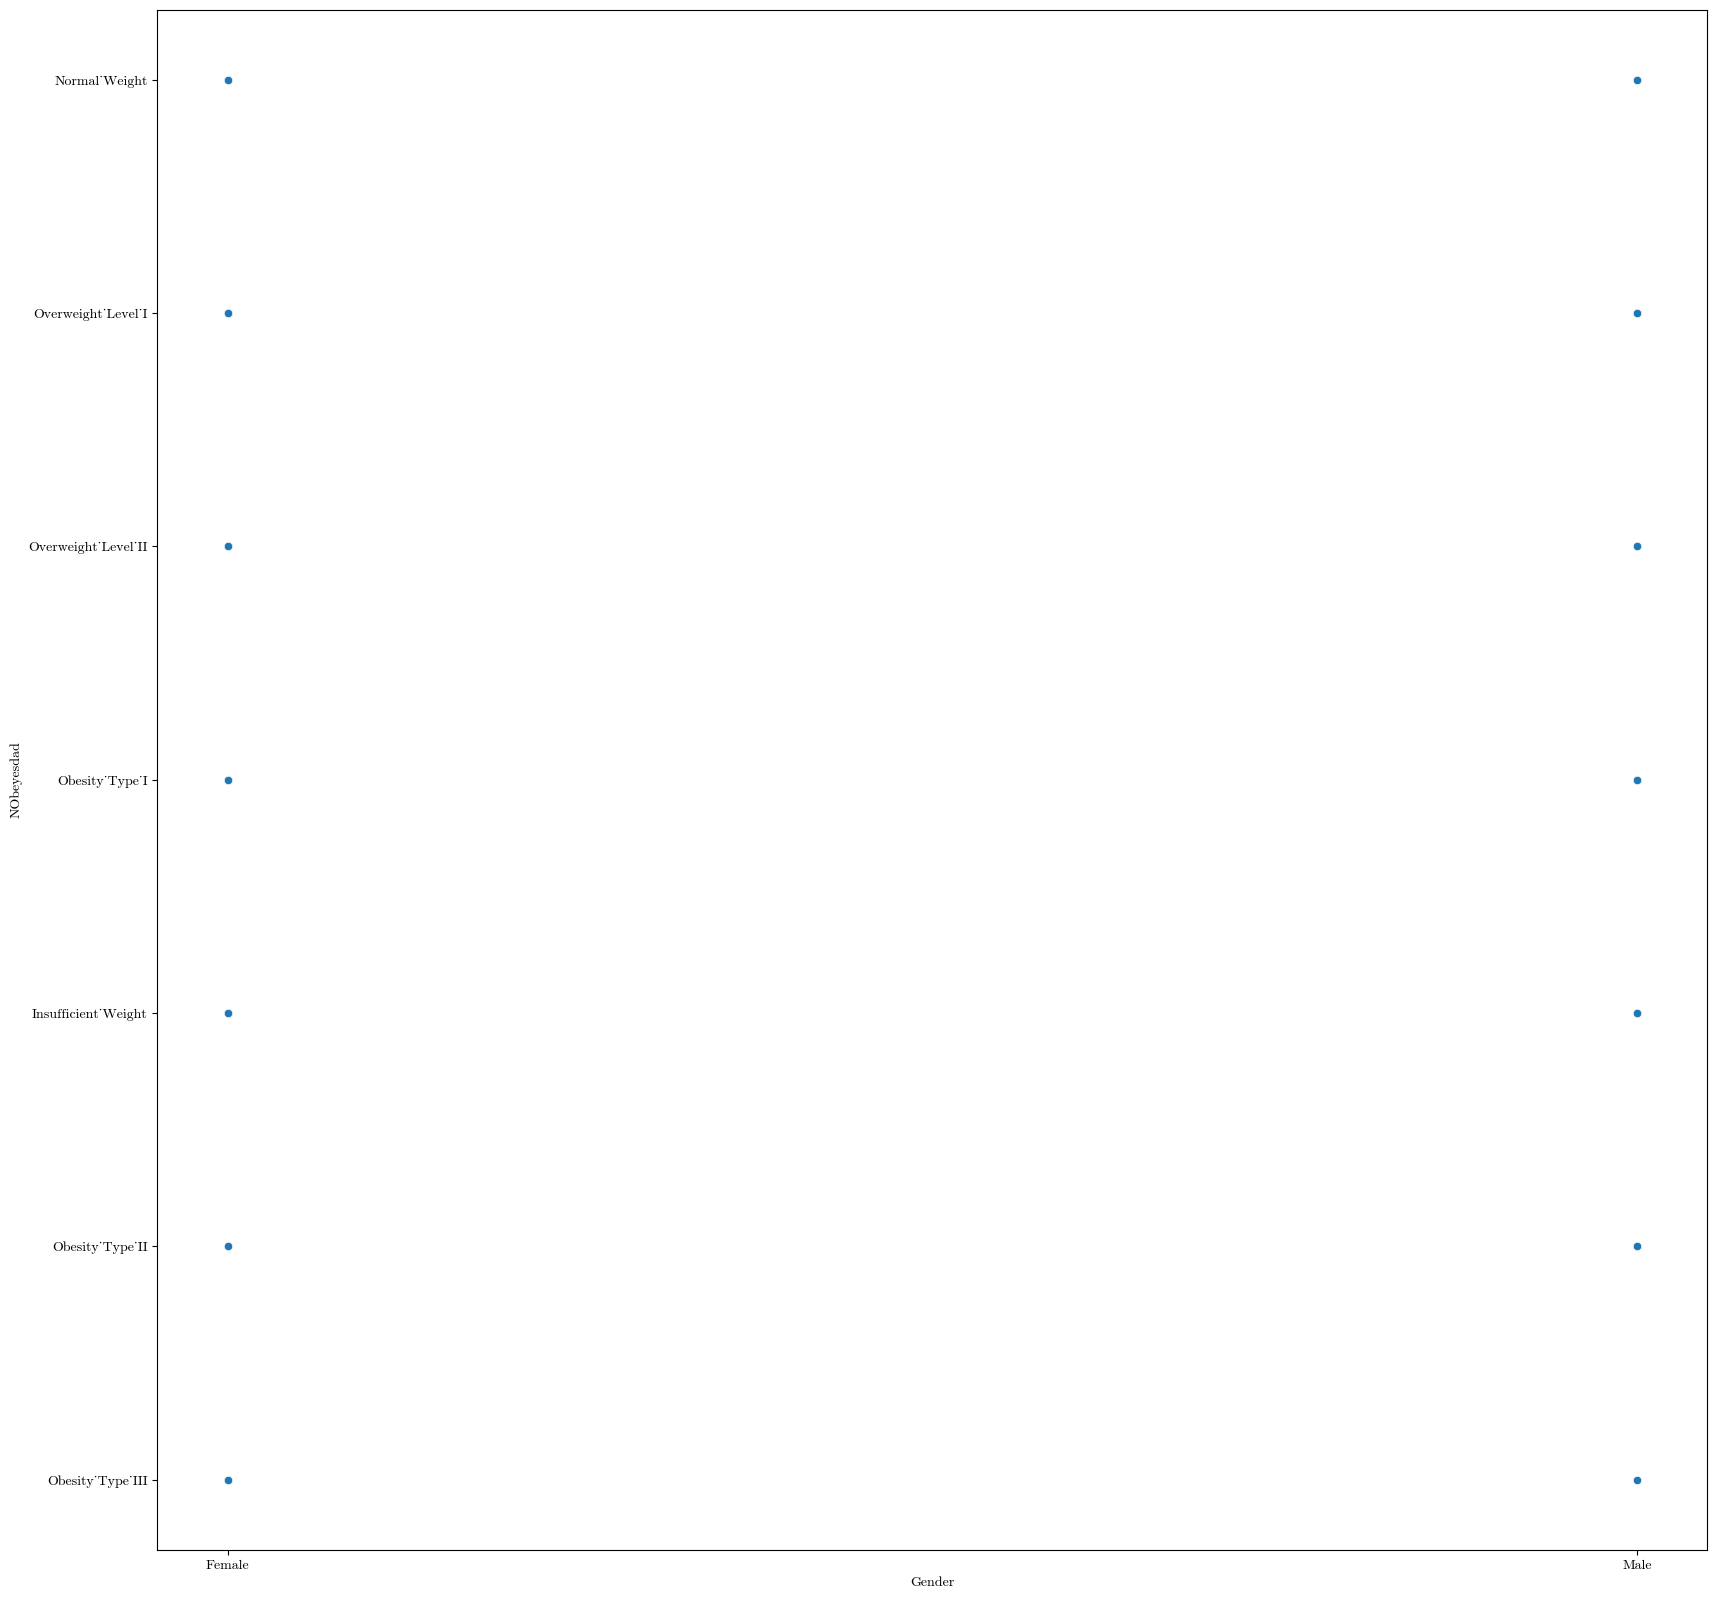

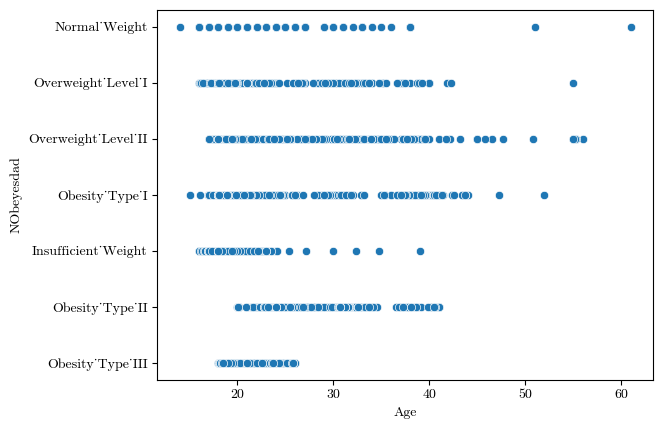

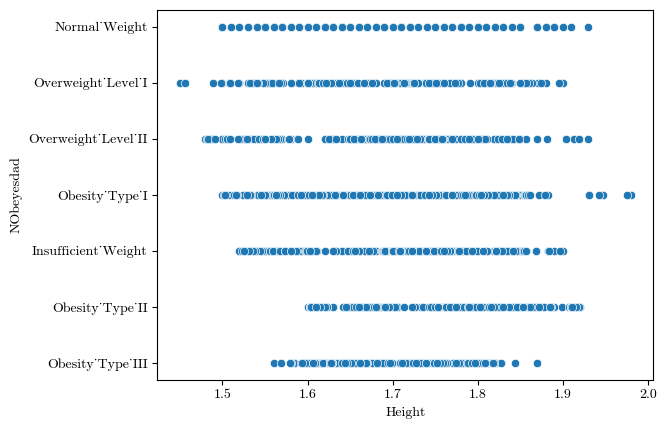

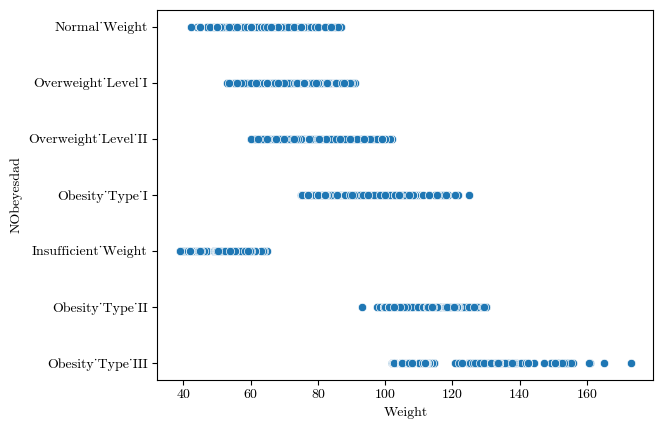

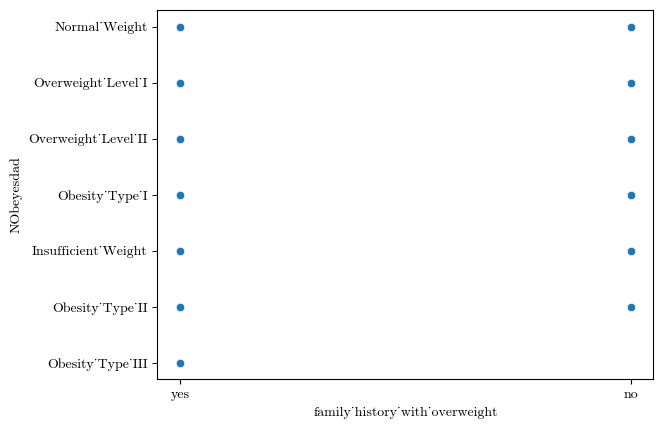

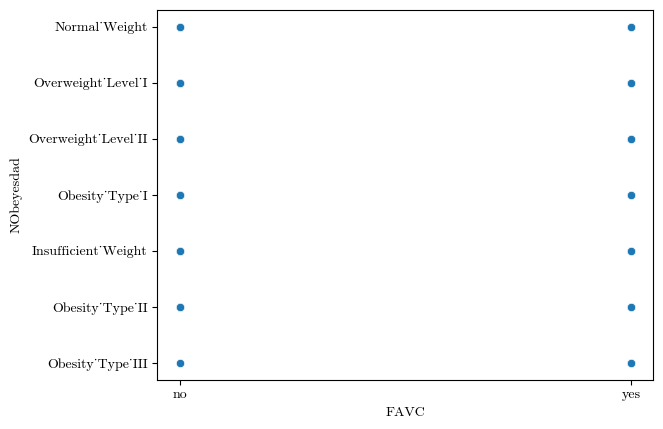

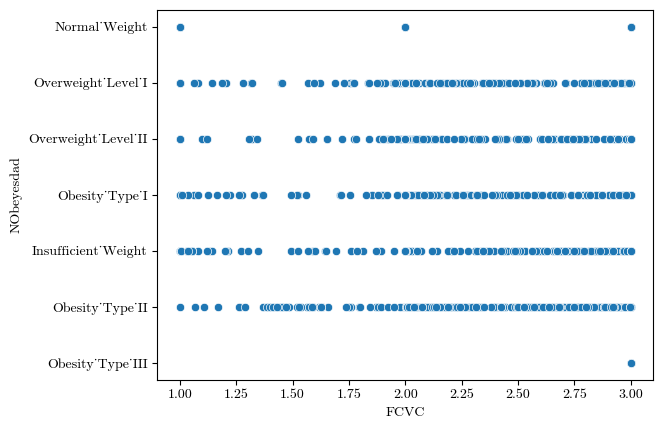

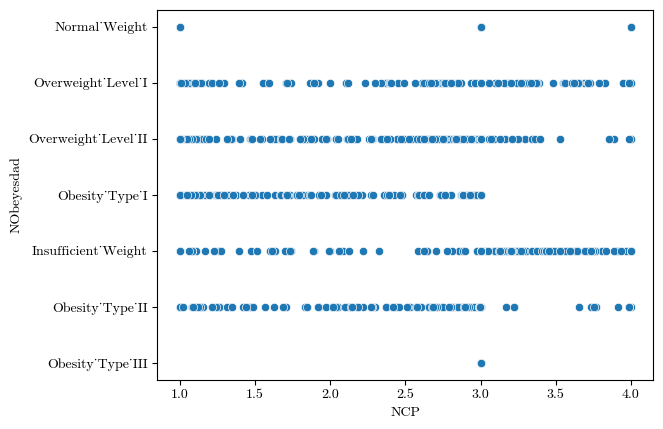

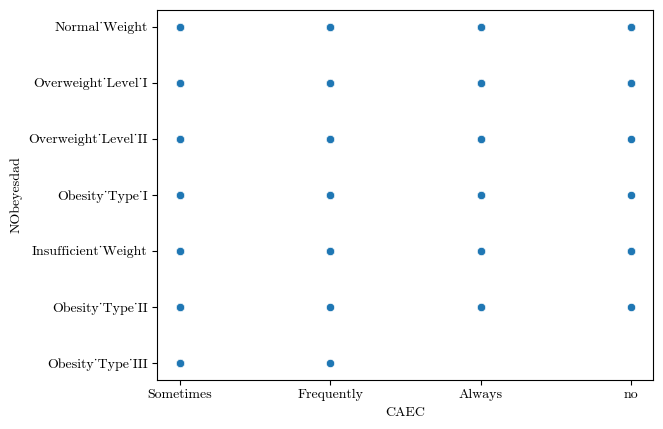

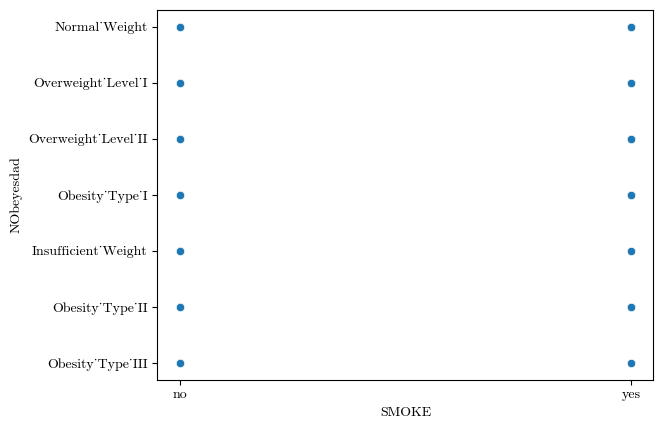

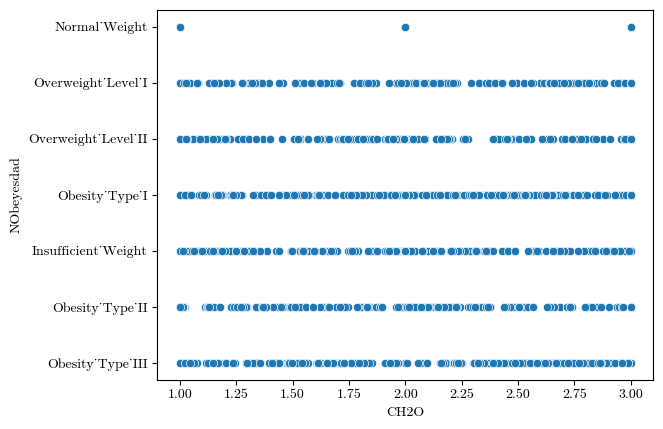

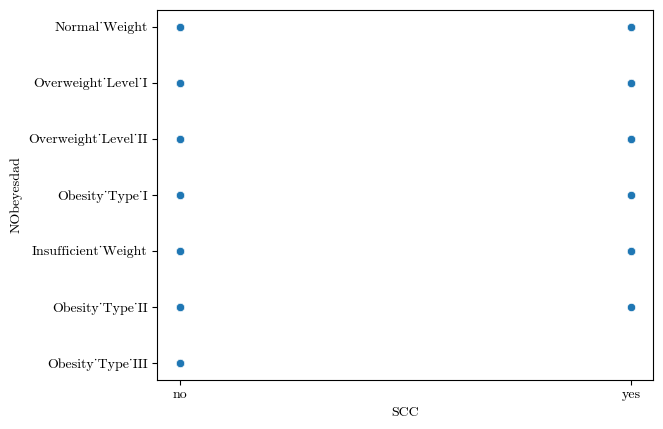

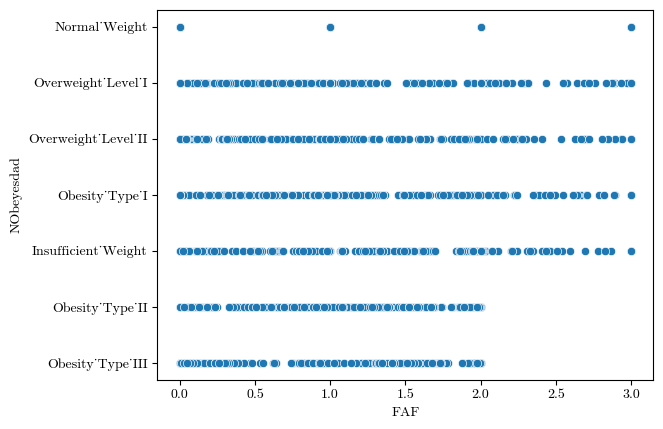

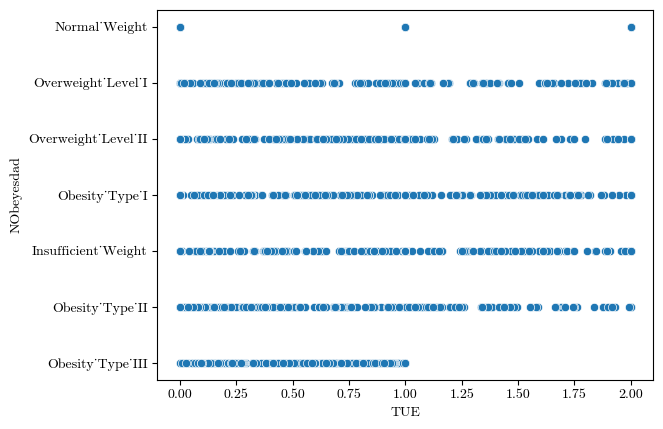

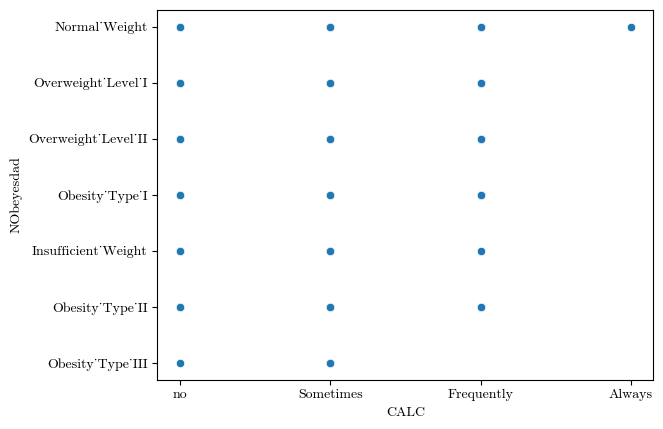

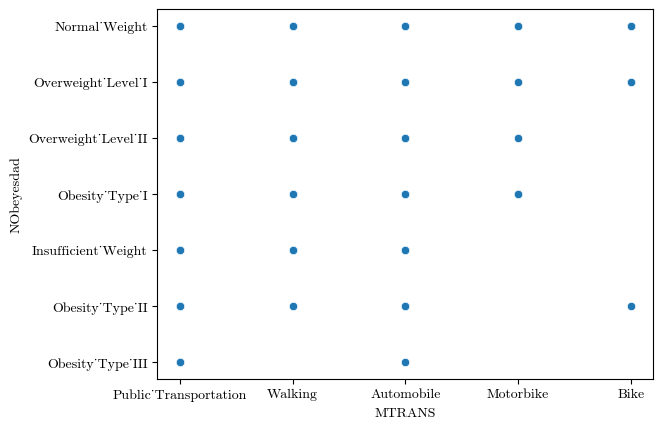

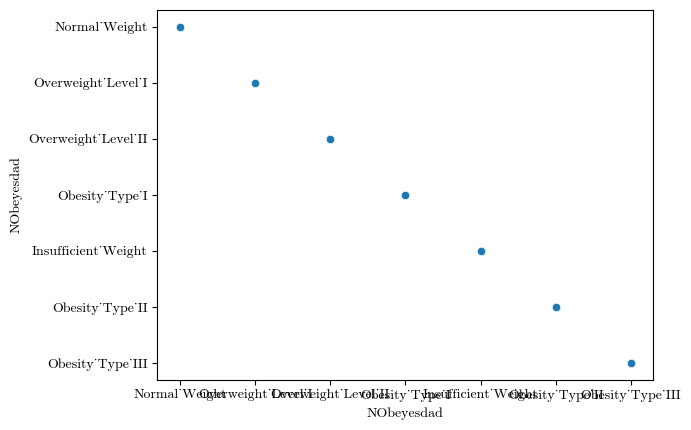

In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plot

# mpl.rc('font',family = 'serif', serif = 'cmr10')
import seaborn as sns
# let's check how our features are related to the target column
plot.figure(figsize=(20,20),facecolor='white')


for column in df.columns:
    sns.scatterplot(x=df[column], y=df['NObeyesdad'])
    plot.xlabel(column,fontsize=10)
    plot.show()

C:\Users\user\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<AxesSubplot:>

C:\Users\user\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


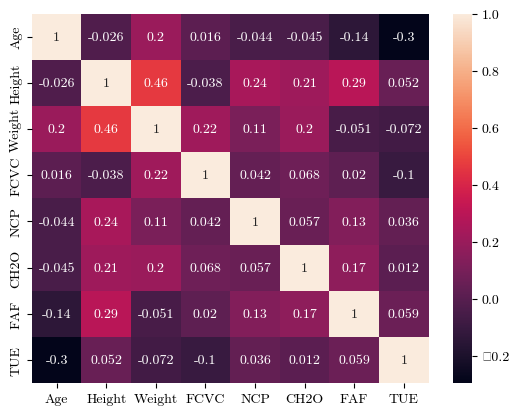

In [12]:
sns.heatmap(df.corr(),annot=True)

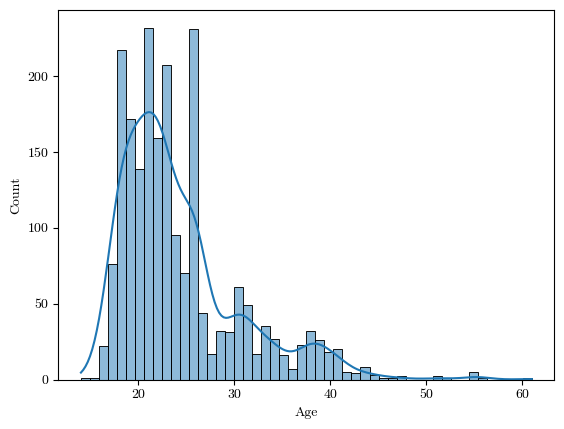

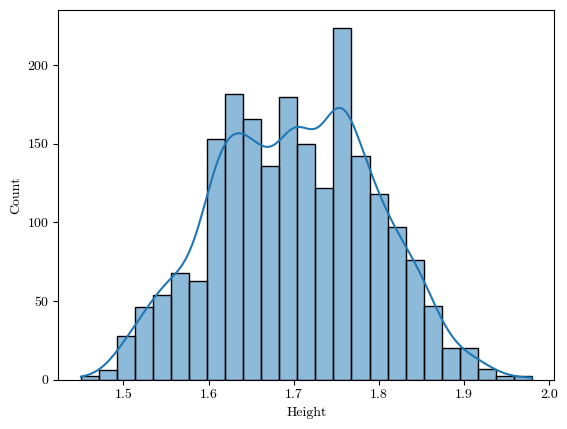

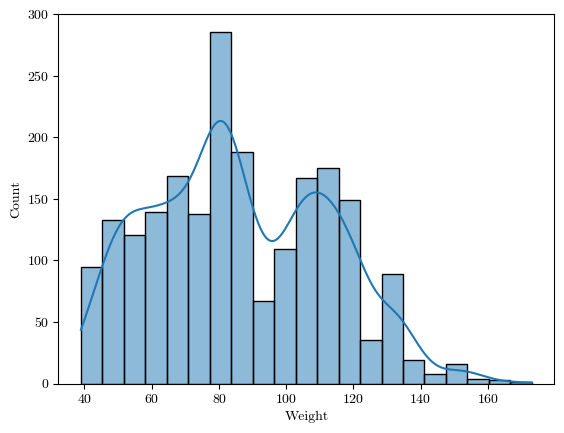

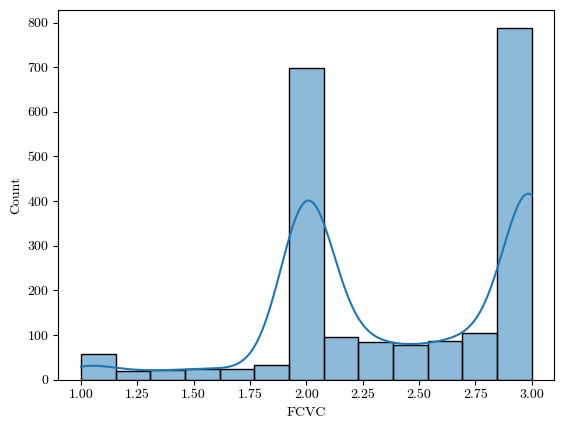

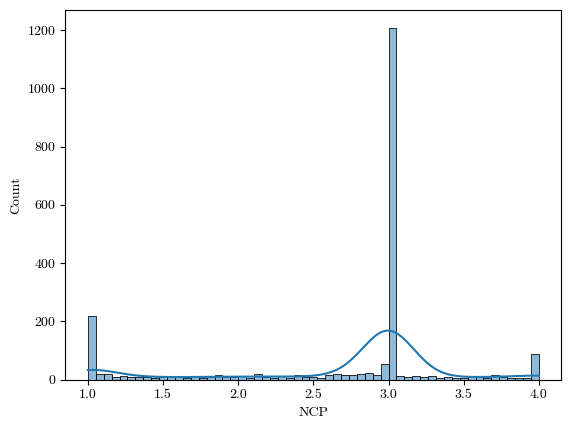

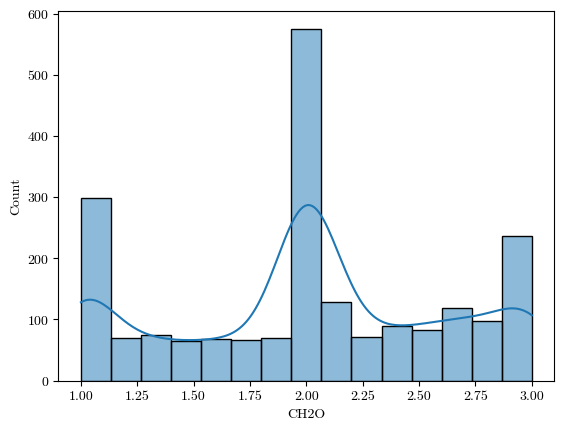

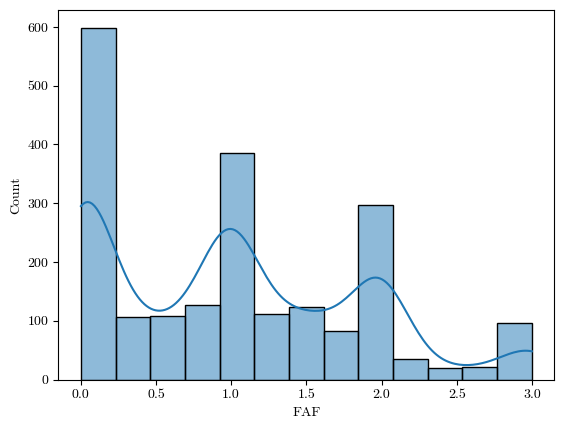

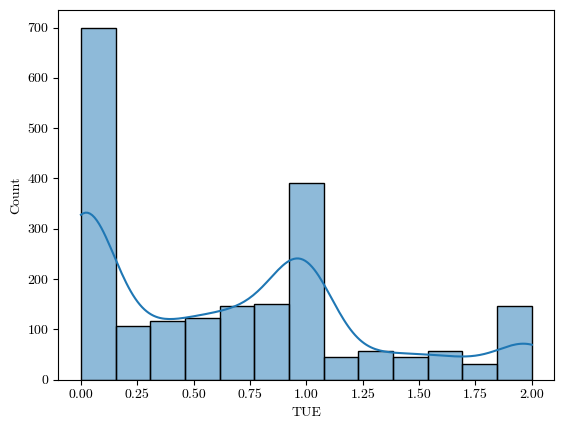

In [13]:
for i in numerical_features:
    sns.histplot(data=df , x=i ,kde=True )
    plt.show()

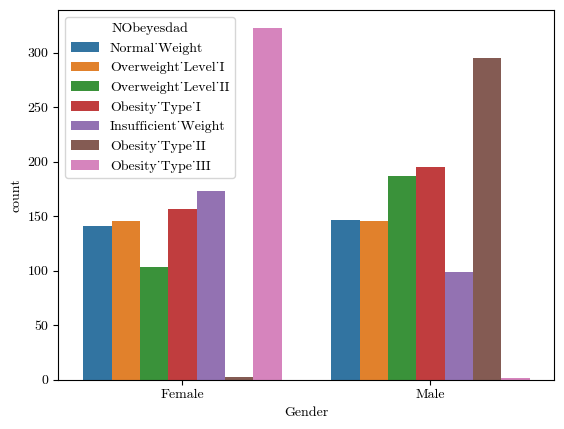

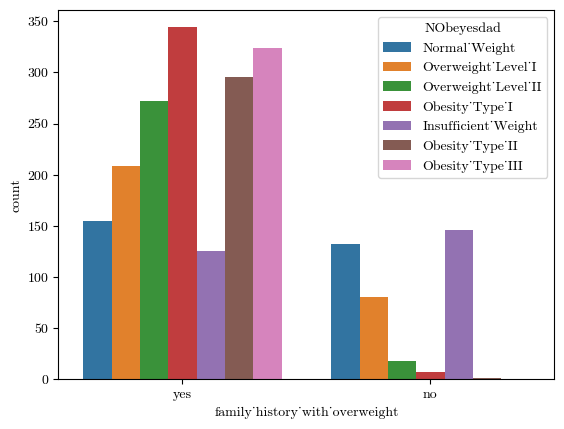

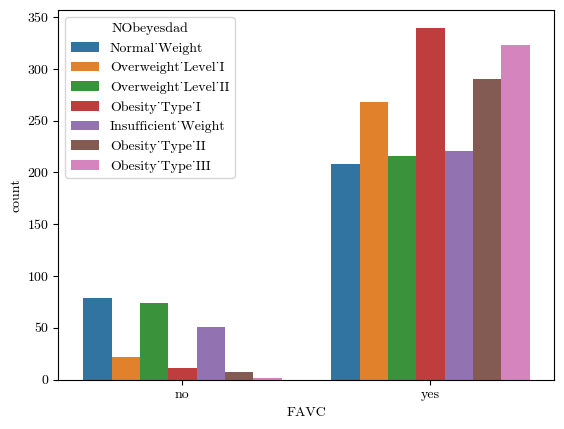

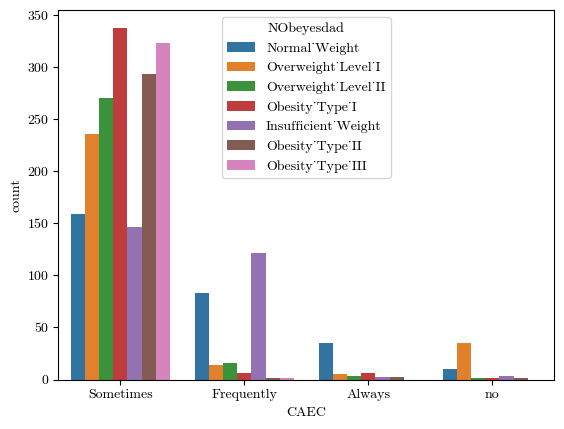

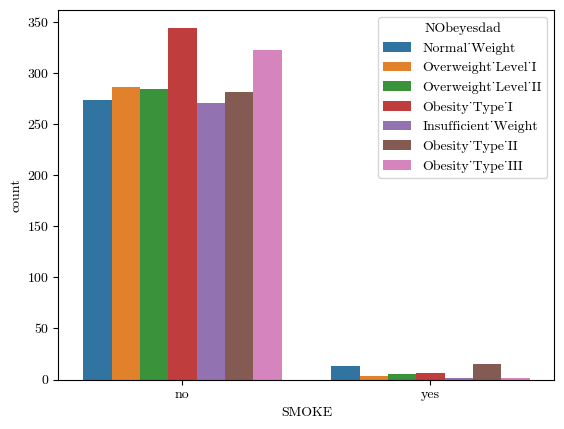

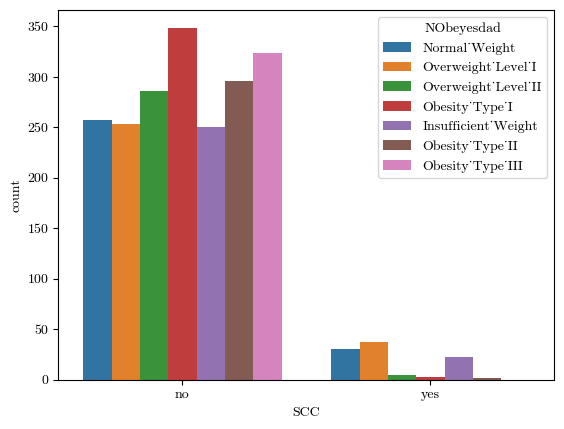

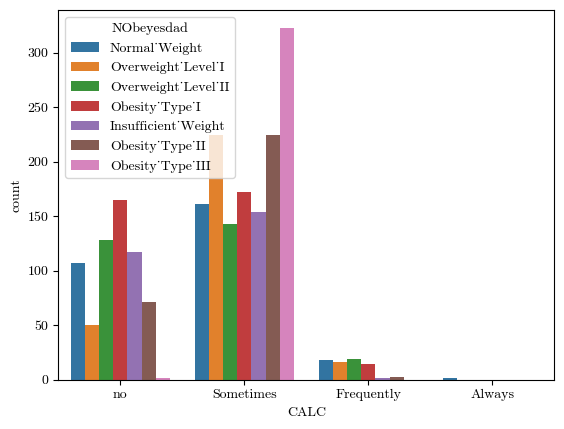

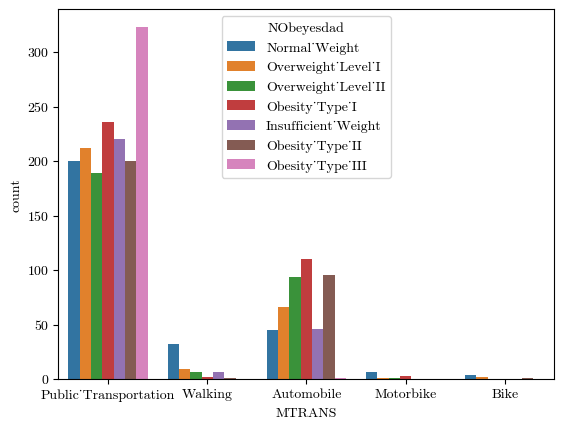

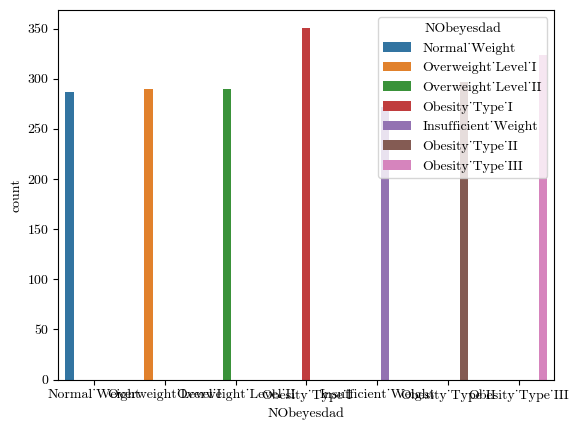

In [16]:
for i in categorical_features:
    
    sns.countplot(data=df , x=i , hue='NObeyesdad' )
    plt.show()

In [17]:
categorical_features

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [57]:
df['family_history_with_overweight'].unique()

array(['yes', 'no'], dtype=object)

In [58]:
gender_cat = ['Male','Female']
family_cat = ['no','yes']
favc_cat   = ['no','yes']
caec_cat   = ['no','Always','Frequently','Sometimes']
smoke_cat  = ['yes','no']
scc_cat    = ['yes','no']
calc_cat   = ['Always' ,'Frequently' , 'Sometimes', 'no']
mtrans_cat = [ 'Motorbike','Bike' ,'Walking', 'Automobile','Public_Transportation']
output_cat = ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
              'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
              'Obesity_Type_III']

In [59]:
categorical_cols = X.select_dtypes(include='object').columns
print(categorical_cols)
numerical_cols = X.select_dtypes(exclude='object').columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS'],
      dtype='object')


In [60]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler ##feature scaling
from sklearn.preprocessing import OrdinalEncoder 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [61]:
num_pipeline= Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())
    ]
)

##Categorical Pipeline

# Categorigal Pipeline
cat_pipeline=Pipeline(
    steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),
    ('ordinalencoder',OrdinalEncoder(categories=[gender_cat,family_cat,favc_cat,caec_cat,smoke_cat,scc_cat,calc_cat,mtrans_cat])),
    ('scaler',StandardScaler())
    ]

)


preprocessor=ColumnTransformer([
('num_pipeline',num_pipeline,numerical_cols),
('cat_pipeline',cat_pipeline,categorical_cols)
])

In [66]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder() 

df['NObeyesdad']=labelencoder.fit_transform(df['NObeyesdad'])
df['NObeyesdad']=df['NObeyesdad'].astype('int')

In [67]:
X = df.drop(labels=['NObeyesdad'],axis=1)
Y = df.NObeyesdad

In [68]:
Y

0       1
1       1
2       1
3       5
4       6
       ..
2106    4
2107    4
2108    4
2109    4
2110    4
Name: NObeyesdad, Length: 2111, dtype: int32

In [104]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,random_state=30)

X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())



In [105]:
X_train

,num_pipeline__Age,num_pipeline__Height,num_pipeline__Weight,num_pipeline__FCVC,num_pipeline__NCP,num_pipeline__CH2O,num_pipeline__FAF,num_pipeline__TUE,cat_pipeline__Gender,cat_pipeline__family_history_with_overweight,cat_pipeline__FAVC,cat_pipeline__CAEC,cat_pipeline__SMOKE,cat_pipeline__SCC,cat_pipeline__CALC,cat_pipeline__MTRANS
0,1.009115,0.897387,0.624642,-0.284371,0.406076,-0.415521,1.175056,-0.403082,-0.993925,0.469746,0.366618,0.370546,0.13901,0.228023,-0.533657,-1.197266
1,-0.666626,-0.337303,-1.003606,1.078015,0.406076,-0.040542,2.352312,-1.086108,1.006112,-2.128811,0.366618,-4.665930,0.13901,0.228023,-0.533657,0.521259
2,1.981378,0.980756,0.564379,-0.376027,-1.413694,1.256799,1.589557,-0.561405,-0.993925,0.469746,0.366618,0.370546,0.13901,0.228023,-0.533657,-1.197266
3,-0.061110,0.711110,1.129451,-1.435354,0.406076,-0.040542,-0.029953,0.053086,-0.993925,0.469746,0.366618,0.370546,0.13901,0.228023,-0.533657,0.521259
4,-0.506536,-0.553202,0.064607,0.063830,-2.153947,1.598335,0.423417,0.564702,1.006112,0.469746,0.366618,0.370546,0.13901,0.228023,1.412543,0.521259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472,-0.356736,0.312195,-0.303682,-0.532979,-2.154728,-0.040542,1.491806,-1.086108,1.006112,0.469746,0.366618,0.370546,0.13901,0.228023,-0.533657,0.521259
1473,0.565304,-2.113748,-0.855790,-0.791612,-2.154728,-1.222865,-1.154592,-1.086108,1.006112,0.469746,-2.727636,0.370546,0.13901,0.228023,1.412543,0.521259
1474,0.286243,-0.851174,0.925439,1.078015,0.406076,1.114058,-1.179455,-0.599135,1.006112,0.469746,0.366618,0.370546,0.13901,0.228023,-0.533657,0.521259
1475,-0.984249,1.497833,-1.003606,1.078015,1.686477,-0.040542,1.175056,-1.086108,-0.993925,0.469746,0.366618,0.370546,0.13901,-4.385530,-0.533657,-1.197266


In [106]:
y_train.shape

(1477,)

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 

In [79]:
df_random= RandomForestClassifier(n_estimators=5)

In [81]:
df_random.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [84]:
df_random.score(X_train,y_train)

0.990521327014218

In [82]:
y_pred = df_random.predict(X_test)

In [83]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.9006309148264984

In [89]:
grid_param={
    'n_estimators':[5,10,15,20,25,50,100],
    'criterion':['gini', 'entropy'],
    'max_depth':range(20),
    'min_samples_leaf':range(10)
}
grid_search = GridSearchCV(param_grid= grid_param , estimator= df_random, cv=10 , n_jobs=10, verbose=1)
grid_search.fit(X_train,y_train)

Fitting 10 folds for each of 2800 candidates, totalling 28000 fits


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
4060 fits failed out of a total of 28000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 340, in fit
    self._validate_params()
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\user\anaconda3\lib\site-packa

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=5), n_jobs=10,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(0, 20),
                         'min_samples_leaf': range(0, 10),
                         'n_estimators': [5, 10, 15, 20, 25, 50, 100]},
             verbose=1)

In [90]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 14,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [91]:
df_best = RandomForestClassifier(criterion= 'entropy',
 max_depth=14,
 min_samples_leaf=2,
 n_estimators=100)

In [93]:
df_best.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=14, min_samples_leaf=2)

In [94]:
y_pred = df_best.predict(X_test)

In [95]:
accuracy_score(y_test,y_pred)

0.9479495268138801

In [108]:
from sklearn.neighbors import KNeighborsClassifier

In [113]:
#Fitting Decision Tree classifier to the training set  
from sklearn.tree import DecisionTreeClassifier  
classifier= DecisionTreeClassifier(criterion='entropy', random_state=0)  
classifier.fit(X_train, y_train)  


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [118]:
classifier.score(X_train,y_train)

1.0

In [110]:
X_test.shape

(634, 16)

In [115]:
y_pred_dt = classifier.predict(X_test)

In [117]:
accuracy_score(y_test,y_pred_dt)

0.9589905362776026